In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Input, Dropout
from tensorflow.keras.datasets.mnist import load_data

In [ ]:
(X_train, y_train), (X_test, y_test) = load_data()
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = Sequential([
                    Input(shape=(28, 28, 1)),
                    Conv2D(32, (5,5), padding='valid', activation='relu'),
                    MaxPool2D(pool_size=(2, 2)),
                    Conv2D(64, (5,5), padding='valid', activation='relu'),
                    MaxPool2D(pool_size=(2, 2)),
                    Flatten(),
                    Dense(256, activation='relu'),
                    Dropout(0.2),
                    Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(
    epochs=5,
    x=X_train,
    y=y_train,
    batch_size=512,
    validation_data=(X_test, y_test)
)

Epoch 1/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 53s 436ms/step - accuracy: 0.6730 - loss: 6.7770 - val_accuracy: 0.9727 - val_loss: 0.0883
Epoch 2/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 82s 437ms/step - accuracy: 0.9676 - loss: 0.1054 - val_accuracy: 0.9804 - val_loss: 0.0596
Epoch 3/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 88s 494ms/step - accuracy: 0.9813 - loss: 0.0635 - val_accuracy: 0.9864 - val_loss: 0.0422
Epoch 4/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 74s 431ms/step - accuracy: 0.9854 - loss: 0.0436 - val_accuracy: 0.9868 - val_loss: 0.0426
Epoch 5/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 85s 460ms/step - accuracy: 0.9870 - loss: 0.0394 - val_accuracy: 0.9876 - val_loss: 0.0351


In [ ]:
## Test image
test_image = np.random.randn(1, 28, 28, 1).astype(np.float32)
test_image = X_test[0].reshape(1, 28, 28, 1).astype(np.float32)
# Declare a vector in which we store activations
layer_outputs = []

for layer in model.layers: # loop through each layer
  temp_model = tf.keras.models.Model(inputs=model.layers[0].input, outputs = layer.output)
  activation = temp_model.predict(test_image)
  layer_outputs.append(activation)

  print(f'Layer: {layer.name}, Output shape: {activation.shape}')
  print(activation)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Layer: conv2d, Output shape: (1, 24, 24, 32)
[[[[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  ...

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
 

In [ ]:
layer_outputs[1][0][0]

array([[0.44837695, 0.5273108 , 0.12387668, 0.30375203, 0.32156304,
        0.30604967, 0.05154643, 0.13167334, 0.3694111 , 0.        ,
        0.3454012 , 0.32421857, 0.29870713, 0.3068498 , 0.63741744,
        0.20828207, 0.21680057, 0.23989956, 0.27759668, 0.05584496,
        0.19267859, 0.6723968 , 0.417618  , 0.47911608, 0.        ,
        0.5226576 , 0.34753197, 0.39083278, 0.32986885, 0.        ,
        0.27661553, 0.24510294],
       [0.39529076, 0.34935957, 0.2994261 , 0.45143673, 0.24737999,
        0.20104435, 0.1981209 , 0.12556858, 0.32500488, 0.21451178,
        0.27463785, 0.292623  , 0.20339051, 0.        , 0.3348322 ,
        0.62612027, 0.0929508 , 0.2794628 , 0.21264073, 0.3445848 ,
        0.28595385, 0.1531389 , 0.06979246, 0.24504888, 0.42477593,
        0.3659011 , 0.247221  , 0.10830465, 0.22903456, 0.35360342,
        0.        , 0.52457327],
       [0.4147189 , 0.35953724, 0.16928378, 0.2147108 , 0.4993024 ,
        0.28881502, 0.07881347, 0.20705757, 0.2625

In [ ]:
layer_outputs[1][0].shape

(12, 12, 32)

In [ ]:
a = layer_outputs[1][0][:, :, 0]

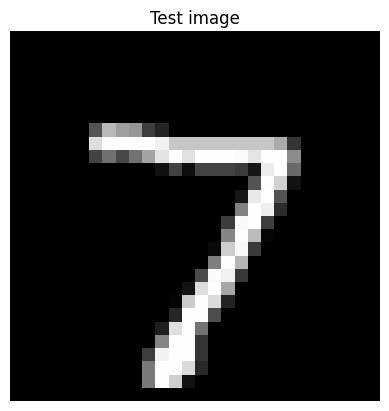

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(test_image.reshape(28, 28), cmap='gray')
plt.title("Test image")
plt.axis('off')
plt.show()

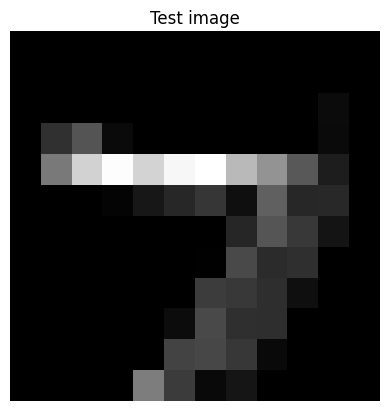

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(a, cmap='gray')
plt.title("Test image")
plt.axis('off')
plt.show()

In [ ]:
layer_outputs[1][0]

array([[[0.44837695, 0.5273108 , 0.12387668, ..., 0.        ,
         0.27661553, 0.24510294],
        [0.39529076, 0.34935957, 0.2994261 , ..., 0.35360342,
         0.        , 0.52457327],
        [0.4147189 , 0.35953724, 0.16928378, ..., 0.12007637,
         0.5644818 , 0.17739387],
        ...,
        [0.16357425, 0.        , 0.05193746, ..., 0.24427491,
         0.19632778, 0.        ],
        [0.3200822 , 0.28553984, 0.27302012, ..., 0.26204503,
         0.14864165, 0.11605804],
        [0.18042855, 0.21257022, 0.0624529 , ..., 0.04194235,
         0.        , 0.24675879]],

       [[0.20074177, 0.20021069, 0.09188952, ..., 0.3672919 ,
         0.12074629, 0.5066984 ],
        [0.37941858, 0.04598251, 0.19336338, ..., 0.7180419 ,
         0.47338757, 0.1620819 ],
        [0.08700792, 0.30575356, 0.2526353 , ..., 0.2107627 ,
         0.13006186, 0.48991168],
        ...,
        [0.17515083, 0.09813629, 0.07155707, ..., 0.3894044 ,
         0.31033418, 0.19470239],
        [0.0

In [ ]:
kernel = model.get_layer('conv2d').get_weights()[0]

In [ ]:
kernel.shape

(5, 5, 1, 32)

In [ ]:
kernel[:, :, 0, 31]

array([[-0.08092594,  0.01189895, -0.00104437, -0.01903543, -0.03674483],
       [-0.0577777 ,  0.06320413,  0.04313363, -0.06790485, -0.0880044 ],
       [-0.05706708,  0.05801137, -0.06184412,  0.04209394, -0.05799857],
       [ 0.06216161,  0.02060744, -0.0614106 ,  0.0209772 , -0.01905781],
       [ 0.05151768,  0.02494236, -0.03094656, -0.04776685, -0.06489293]],
      dtype=float32)

In [ ]:
X_test[0].shape

(28, 28, 1)

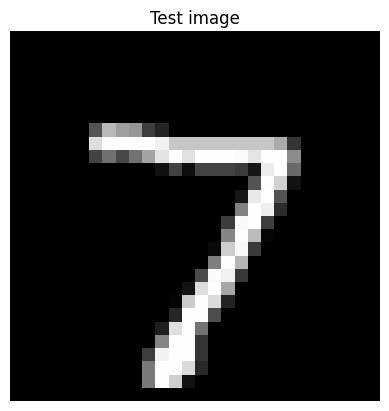

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_test[0].reshape(28, 28), cmap='gray')
plt.title("Test image")
plt.axis('off')
plt.show()

In [ ]:
prediction = model.predict(np.expand_dims(X_test[0], axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


In [ ]:
prediction

array([[7.8165547e-15, 4.0756131e-12, 7.8465832e-14, 4.0075786e-08,
        1.0874929e-09, 3.4626182e-12, 1.6450093e-14, 1.0000000e+00,
        5.8196833e-11, 1.8048546e-09]], dtype=float32)

In [ ]:
np.argmax(prediction)

7

## Object detection example


In [ ]:
!pip install ultralyticsplus

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.4/112.4 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 699.1/699.1 kB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 19.5 MB/s eta 0:00:00
   ━━━━━━

/usr/local/lib/python3.11/dist-packages/ultralytics/nn/tasks.py:634: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location="cpu"), file  # load



0: 512x640 2 persons, 3 dogs, 598.7ms
Speed: 4.8ms preprocess, 598.7ms inference, 1.6ms postprocess per image at shape (1, 3, 512, 640)


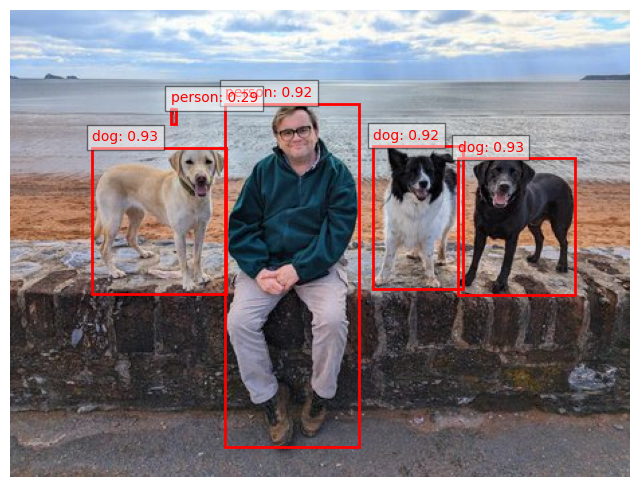

In [ ]:
from ultralyticsplus import YOLO
import matplotlib.patches as patches
from PIL import Image
import matplotlib.pyplot as plt
# load model
model = YOLO('ultralyticsplus/yolov8s')


# set image
image_path = 'course_example.jpeg'
image = Image.open(image_path).convert('RGB')

# perform inference
results = model.predict(image)

# extract detection results
boxes = results[0].boxes.xyxy # Bounding box coordinates
scores = results[0].boxes.conf # Confidence scores
labels = results[0].boxes.cls # Class labels

# Plot image
fix, ax = plt.subplots(1, figsize=(8, 8))
ax.imshow(image)

# Draw bounding boxes
for box, score, label in zip(boxes, scores, labels):
  x_min, y_min, x_max, y_max = box.tolist()
  width, height = x_max - x_min, y_max - y_min
  rect = patches.Rectangle((x_min, y_min), width, height, linewidth=2, edgecolor="r", facecolor="none")
  ax.add_patch(rect)
  ax.text(x_min, y_min - 5, f"{model.names[int(label)]}: {score:.2f}", color="red", fontsize=10, bbox=dict(facecolor="white", alpha=0.5))

plt.axis('off')
plt.show()

## Image segmentation

You are using a model of type birefnet to instantiate a model of type SegformerForSemanticSegmentation. This is not supported for all configurations of models and can yield errors.


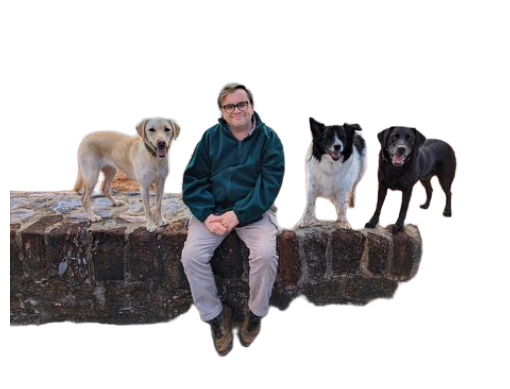

In [ ]:
import torch
from torchvision import transforms
from transformers import AutoModelForImageSegmentation

model = AutoModelForImageSegmentation.from_pretrained('briaai/RMBG-2.0', trust_remote_code=True)
torch.set_float32_matmul_precision(['high', 'highest'][0])
model.eval()

# Data settings
image_size = (1024, 1024)
transform_image = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

input_image_path = 'course_example.jpeg'

image = Image.open(input_image_path)
input_images = transform_image(image).unsqueeze(0)

# Prediction
with torch.no_grad():
    preds = model(input_images)[-1].sigmoid().cpu()
pred = preds[0].squeeze()
pred_pil = transforms.ToPILImage()(pred)
mask = pred_pil.resize(image.size)
image.putalpha(mask)

plt.imshow(image)
plt.axis("off")
plt.show()

In [ ]:
!pip install kornia

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.6 MB/s eta 0:00:00
